<h1 style="color:#2E86C1; text-align:center;"> Partitioning Techniques in AI Models for Wireless Network Optimization</h1>
<!-- <h2 style="color:#117864;">Assignment 01: Contributions</h2> -->
 
<table style="border-collapse: collapse; width: 100%; font-size: 16px;">
<thead>
<tr style="background-color: #D6EAF8;">
<th style="border: 1px solid #ABB2B9; padding: 8px;">👤 Name</th>
<th style="border: 1px solid #ABB2B9; padding: 8px;">🆔 BITS ID</th>
<th style="border: 1px solid #ABB2B9; padding: 8px;">📈 Contribution</th>
</tr>
</thead>
<tbody>
<tr style="background-color: #FDFEFE;">
<td style="border: 1px solid #ABB2B9; padding: 8px;">SUBHRANSU MISHRA</td>
<td style="border: 1px solid #ABB2B9; padding: 8px;">2023AC05489</td>
<td style="border: 1px solid #ABB2B9; padding: 8px;">✅ 100%</td>
</tr>
<tr style="background-color: #F8F9F9;">
<td style="border: 1px solid #ABB2B9; padding: 8px;">DULAL DAS</td>
<td style="border: 1px solid #ABB2B9; padding: 8px;">2023AC05041</td>
<td style="border: 1px solid #ABB2B9; padding: 8px;">✅ 100%</td>
</tr>
<tr style="background-color: #FDFEFE;">
<td style="border: 1px solid #ABB2B9; padding: 8px;"> LAKSHMISRINIVAS PERAKAM</td>
<td style="border: 1px solid #ABB2B9; padding: 8px;">2023AC05540</td>
<td style="border: 1px solid #ABB2B9; padding: 8px;">✅ 100%</td>
</tr>
<tr style="background-color: #F8F9F9;">
<td style="border: 1px solid #ABB2B9; padding: 8px;">ARCHAN GHOSH</td>
<td style="border: 1px solid #ABB2B9; padding: 8px;">2023AC05042</td>
<td style="border: 1px solid #ABB2B9; padding: 8px;">✅ 100%</td>
</tr>
</tbody>
</table>
 
<p style="text-align:center; font-size: 14px; color:gray; margin-top:20px;">
Each member contributed equally towards the completion of this assignment.
</p>

<div style="
    background-color: #f0f8ff;
    border-left: 4px solid #040f01;
    padding: 12px;
    margin-top: 15px;
    font-family: sans-serif;
">
<h1 style="color: #040f01; margin-top: 0;">Part 2: Practical Implementation</h1>
    <p>

We need to apply **vertical** and **horizontal partitioning** techniques to AI models to **predict network latency** in wireless communication systems. The dataset contains **tower and user attributes**, and we will analyze how these partitioning strategies affect the model’s:
- **Performance**
- **Scalability**
- **Practical deployment**
        
In this section, we will apply the concepts of vertical and horizontal partitioning to build, train, and evaluate models using wireless network datasets.

We will:
- **Prepare the dataset.**
- **Implement baseline models.**
- **Apply vertical and horizontal partitioning.**
- **Evaluate and compare performance across all strategies.**</p>
</div>

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

### Load and Preprocess Dataset

In [2]:
# Load dataset
data = pd.read_excel('partitioning_dataset.xlsx')

print("Shape of the dataset:", data.shape)
data.head()

Shape of the dataset: (150, 7)


,Tower ID,Signal Strength (dBm),Network Traffic (MB),Latency (ms),User Count,Device Type,Location Type
0,TWR001,-83,522,59,106,IoT Device,Rural
1,TWR002,-89,550,23,159,Laptop,Rural
2,TWR003,-73,2190,46,109,IoT Device,Rural
3,TWR004,-75,483,62,200,Tablet,Rural
4,TWR005,-76,2381,51,134,IoT Device,Rural


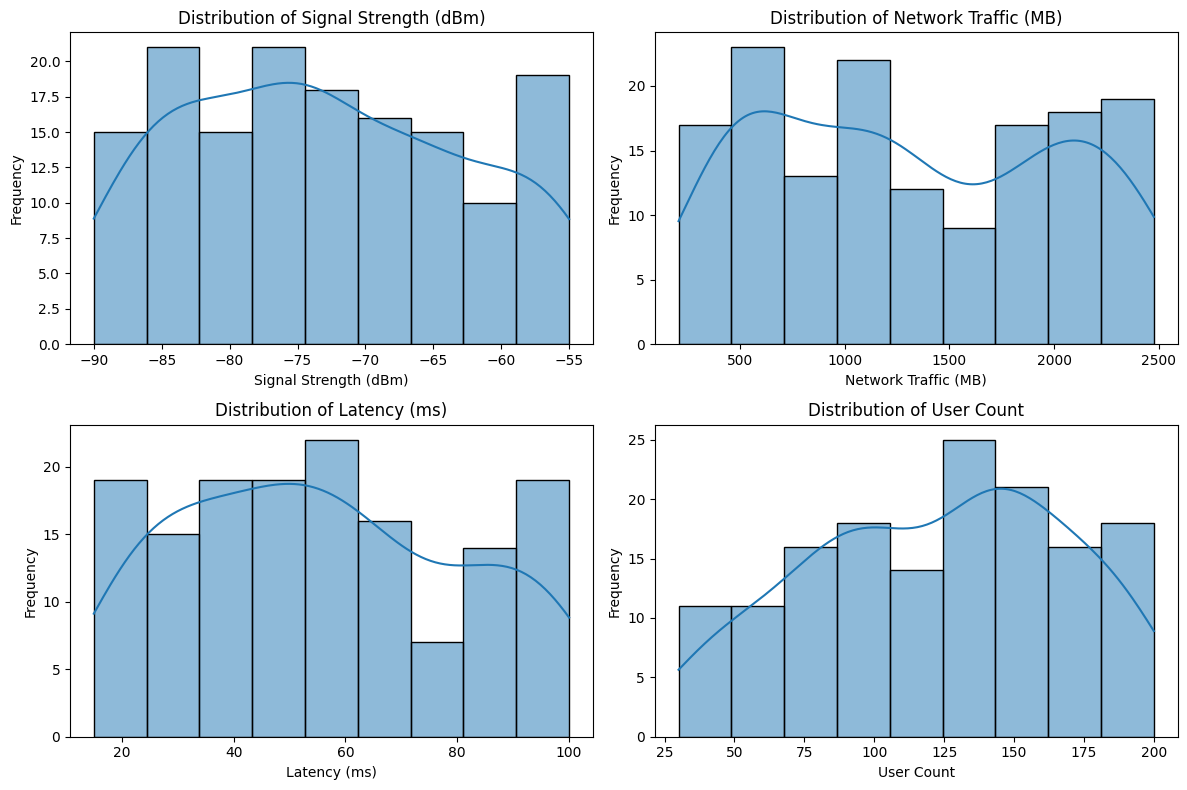

In [3]:
numerical_cols = ['Signal Strength (dBm)', 'Network Traffic (MB)', 'Latency (ms)', 'User Count']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

<div style="
    background-color: #d9f0d3;
    border-left: 4px solid #040f01;
    padding: 12px;
    margin-top: 15px;
    font-family: sans-serif;
">
<h2 style="color: #040f01; margin-top: 0;">A. Vertical Partitioning</h2>
    <p>
        
In this section, we explore vertical partitioning by splitting the features into two distinct groups: **infrastructure-related** and **user-related** attributes.

We will:
- Separate the dataset into two views: **infrastructure features** (`Signal Strength`, `Network Traffic`) and **user features** (`User Count`, `Device Type`).
- Train individual models on each feature group.
- Combine predictions using **fusion** techniques:
  - Stacking with a meta-model (e.g., Linear Regression, XGBoost)
- Compare the **fused model's** performance against a **baseline monolithic model** trained on all features together.</p>
</div>

### Preprocess Dataset

In [4]:

# Drop non-predictive columns
data_cleaned = data.drop(columns=['Tower ID', 'Location Type'])

# Define feature groups
features_infra = ['Signal Strength (dBm)', 'Network Traffic (MB)']
features_user = ['User Count', 'Device Type']
target = 'Latency (ms)'

# Split features and target
X_infra = data_cleaned[features_infra]
X_user = data_cleaned[features_user]
y = data_cleaned[target]


### Train-Test Splitting

In [5]:
# Split data into train+val and test (80/20)
X_infra_trainval, X_infra_test, X_user_trainval, X_user_test, y_trainval, y_test = train_test_split(
    X_infra, X_user, y, test_size=0.2, random_state=42
)

In [6]:
# Further split train+val into train and val (60/20/20 total split)
X_infra_train, X_infra_val, X_user_train, X_user_val, y_train, y_val = train_test_split(
    X_infra_trainval, X_user_trainval, y_trainval, test_size=0.25, random_state=42
)

<div style="
    background-color: #d9f0d3;
    border-left: 4px solid #040f01;
    padding: 12px;
    margin-top: 15px;
    font-family: sans-serif;
">
<h4 style="color: #040f01; margin-top: 0;">Define Sub-model Pipelines</h4>
</div>

**Infrastructure Model Pipeline:**

In [7]:
model_infra = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


**User Behavior Model Pipeline (handles categorical data):**

In [8]:
# Define encoder for user features
encoder = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), ['Device Type'])],
    remainder='passthrough',
    force_int_remainder_cols=False
)

model_user = Pipeline([
    ('encoder', encoder),
    ('scaler', StandardScaler(with_mean=False)),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


### Train Both Sub-models

In [9]:
model_infra.fit(X_infra_train, y_train)
model_user.fit(X_user_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Device Type'])])),
                ('scaler', StandardScaler(with_mean=False)),
                ('regressor', RandomForestRegressor(random_state=42))])

<div style="
    background-color: #d9f0d3;
    border-left: 4px solid #040f01;
    padding: 12px;
    margin-top: 15px;
    font-family: sans-serif;
">
<h4 style="color: #040f01; margin-top: 0;">Generate Predictions and Fuse Outputs</h4>
</div>

In [10]:
# Individual predictions
infra_val_preds = model_infra.predict(X_infra_val)
user_val_preds = model_user.predict(X_user_val)
X_stack_train = np.column_stack((infra_val_preds, user_val_preds))
y_stack_train = y_val

### Fusion of Sub-Model Predictions

### What is Prediction Fusion?

Prediction fusion is the process of combining the outputs of multiple models to generate a **single, more accurate prediction**. This is particularly useful when individual models are trained on **different feature sets** (e.g., infrastructure vs. user data), each capturing a unique aspect of the problem.

By fusing their outputs, we aim to:
- Leverage complementary information
- Improve prediction accuracy and robustness
- Mitigate individual model biases

### Common Fusion Techniques:
- **Simple Average**: Mean of predictions from both models.
- **Weighted Average**: Assigns more importance to the stronger model.
- **Max/Min Fusion**: Takes the most optimistic or conservative prediction.
- **Stacking (Meta-model Fusion)**: Trains a new model on the predictions of sub-models.
- **And there are other methods aswell.**

### Our Approach: Stacking (Meta-model Fusion)

We use the predictions from `model_infra` and `model_user` as inputs to a **meta-regressor** (e.g., `LinearRegression`) trained on a **validation set**. This meta-model learns how to best combine the sub-model predictions to improve overall latency prediction accuracy.


**Stacking (Meta-model Fusion): Train a meta-regressor on the outputs of both models.**

In [11]:
# Train meta-model on validation predictions
meta_model = LinearRegression()
meta_model.fit(X_stack_train, y_stack_train)

# Generate test predictions from base models
infra_test_preds = model_infra.predict(X_infra_test)
user_test_preds = model_user.predict(X_user_test)
X_stack_test = np.column_stack((infra_test_preds, user_test_preds))

# Predict using meta-model (stacking fusion)
fused_preds = meta_model.predict(X_stack_test)

### Evaluate Stacked Fusion

In [12]:
mae = mean_absolute_error(y_test, fused_preds)

''' error because in your environment (Python 3.12 with an older version of scikit-learn), 
the mean_squared_error function doesn't support the squared argument.'''
#rmse = mean_squared_error(y_test, fused_preds, squared=False)

mse = mean_squared_error(y_test, fused_preds)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, fused_preds)

In [13]:
# Print scores with formatting
print("Fused Model Evaluation Metrics (Stacked Fusion)\n" + "-"*50)
print(f"Mean Absolute Error (MAE):     {mae:.4f} ms")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f} ms")
print(f"R² Score:                       {r2:.4f}")

Fused Model Evaluation Metrics (Stacked Fusion)
--------------------------------------------------
Mean Absolute Error (MAE):     21.2235 ms
Root Mean Squared Error (RMSE): 24.9642 ms
R² Score:                       -0.0169


<div style="
    background-color: #d9f0d3;
    border-left: 4px solid #040f01;
    padding: 12px;
    margin-top: 15px;
    font-family: sans-serif;
">
<h4 style="color: #040f01; margin-top: 0;">Baseline monolithic model (no partitioning)</h4>
</div>

In [14]:
X_full = data_cleaned.drop(columns=[target])
X_full_train, X_full_test, y_train_full, y_test_full = train_test_split(
    X_full, y, test_size=0.2, random_state=42
)

In [15]:
baseline_pipeline = Pipeline([
    ('encoder', encoder),
    ('scaler', StandardScaler(with_mean=False)),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [16]:
baseline_pipeline.fit(X_full_train, y_train_full)
baseline_preds = baseline_pipeline.predict(X_full_test)

In [17]:
baseline_mae = mean_absolute_error(y_test_full, baseline_preds)

#baseline_rmse = mean_squared_error(y_test_full, baseline_preds, squared=False)

mse = mean_squared_error(y_test_full, baseline_preds)
baseline_rmse = np.sqrt(mse)

baseline_r2 = r2_score(y_test_full, baseline_preds)

In [18]:
# Print scores with formatting
print("Baseline Monolithic Model Evaluation Metrics \n" + "-"*50)
print(f"Mean Absolute Error (MAE):     {baseline_mae:.4f} ms")
print(f"Root Mean Squared Error (RMSE): {baseline_rmse:.4f} ms")
print(f"R² Score:                       {baseline_r2:.4f}")

Baseline Monolithic Model Evaluation Metrics 
--------------------------------------------------
Mean Absolute Error (MAE):     23.1640 ms
Root Mean Squared Error (RMSE): 27.3914 ms
R² Score:                       -0.2242


<div style="
    background-color: #d9f0d3;
    border-left: 4px solid #040f01;
    padding: 12px;
    margin-top: 15px;
    font-family: sans-serif;
">
<h4 style="color: #040f01; margin-top: 0;">Vertical Partitioning: Model Performance Comparison</h4>
</div>


Model Performance Comparison:
                                    Model        MAE       RMSE  R² Score
0  Stacked Fusion (Vertical Partitioning)  21.223541  24.964209 -0.016863
1               Baseline Monolithic Model  23.164000  27.391381 -0.224207
Model Performance Comparison:


,Model,MAE,RMSE,R² Score
0,Stacked Fusion (Vertical Partitioning),21.223541,24.964209,-0.016863
1,Baseline Monolithic Model,23.164000,27.391381,-0.224207


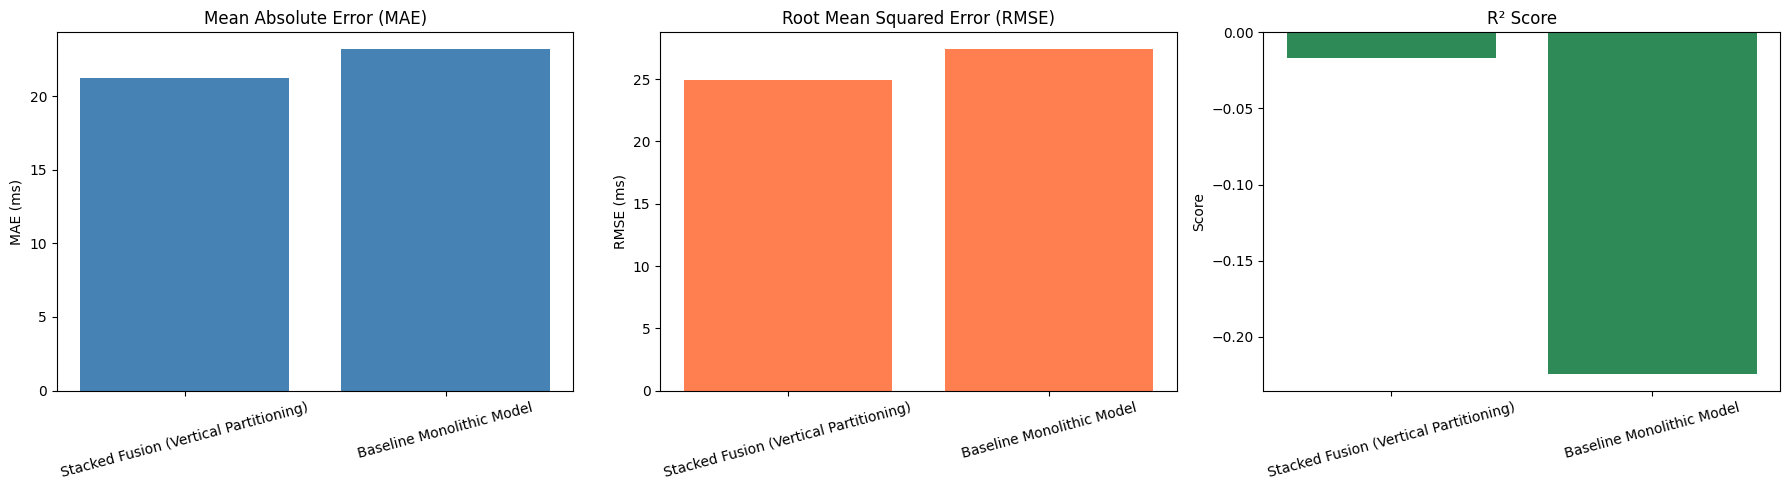

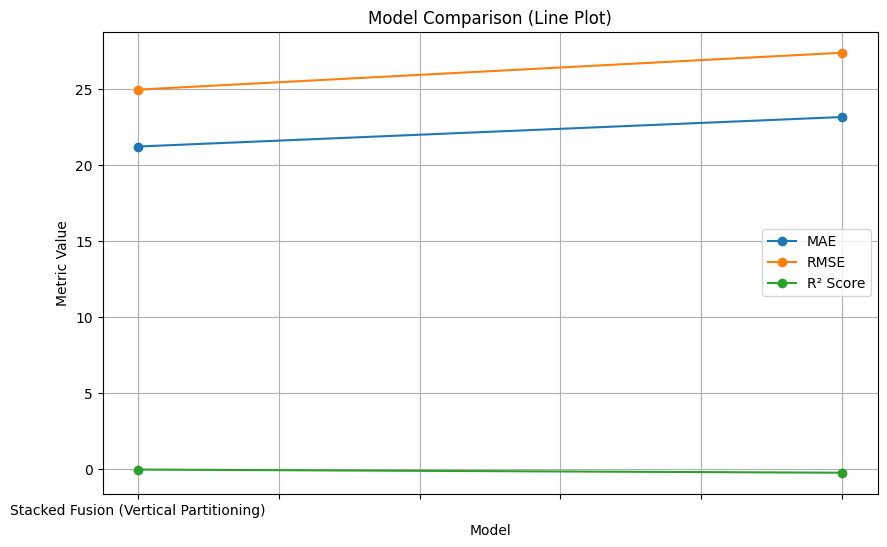

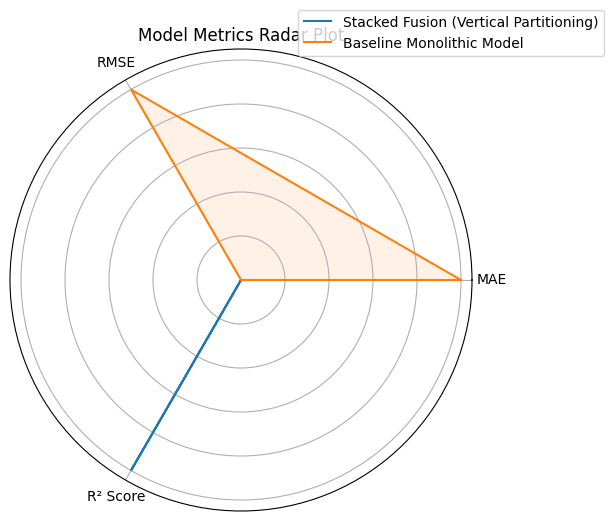

In [19]:
performance_table = pd.DataFrame({
    'Model': ['Stacked Fusion (Vertical Partitioning)', 'Baseline Monolithic Model'],
    'MAE': [mae, baseline_mae],
    'RMSE': [rmse, baseline_rmse],
    'R² Score': [r2, baseline_r2]
})

print("Model Performance Comparison:")
print(performance_table)

# Display table
print("Model Performance Comparison:")
display(performance_table)

# 1. Bar Charts
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].bar(performance_table['Model'], performance_table['MAE'], color='steelblue')
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_ylabel('MAE (ms)')
axes[0].tick_params(axis='x', rotation=15)

axes[1].bar(performance_table['Model'], performance_table['RMSE'], color='coral')
axes[1].set_title('Root Mean Squared Error (RMSE)')
axes[1].set_ylabel('RMSE (ms)')
axes[1].tick_params(axis='x', rotation=15)

axes[2].bar(performance_table['Model'], performance_table['R² Score'], color='seagreen')
axes[2].set_title('R² Score')
axes[2].set_ylabel('Score')
axes[2].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

# 2. Line Plot
performance_table.set_index('Model')[['MAE', 'RMSE', 'R² Score']].plot(
    kind='line', marker='o', figsize=(10, 6), title='Model Comparison (Line Plot)'
)
plt.ylabel('Metric Value')
plt.grid(True)
plt.show()

# 3. Radar Plot
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(performance_table[['MAE', 'RMSE', 'R² Score']])
labels = ['MAE', 'RMSE', 'R² Score']
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
for idx, row in enumerate(normalized_data):
    values = row.tolist() + [row[0]]
    ax.plot(angles, values, label=performance_table['Model'][idx])
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticklabels([])
ax.set_title("Model Metrics Radar Plot")
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()



| **Metric**   | **Stacked Fusion (Vertical Partitioning)** | **Baseline Monolithic Model** |
|--------------|---------------------------------------------|-------------------------------|
| **MAE**      | 21.22 ms                                    | 23.16 ms                      |
| **RMSE**     | 24.96 ms                                    | 27.39 ms                      |
| **R² Score** | -0.0169                                     | -0.2242                       |


## What’s we did

- **Train/val/test split** to avoid data leakage during stacking
- **Meta-model** (`LinearRegression`) learns how to best combine sub-model predictions
- **Performance** is now measured using the fused model output: `fused_preds`


<div style="
    background-color: #d9f0d3;
    border-left: 4px solid #040f01;
    padding: 12px;
    margin-top: 15px;
    font-family: sans-serif;
">
<h2 style="color: #040f01; margin-top: 0;">Key Insights</h2>
    <p>

### **Model Performance**

**Mean Absolute Error (MAE)**
- The **stacked fusion model** has a **lower MAE** than the baseline.
- This means it makes **smaller errors on average** in predicting latency.

**Root Mean Squared Error (RMSE)**
- Again, the **stacked fusion model** has a **lower RMSE**, indicating that **larger errors are less frequent** compared to the baseline.
- RMSE penalizes large errors more than MAE, so this is a **strong sign** that fusion improves stability.

**R² Score (Coefficient of Determination)**
- Both models have **negative R² scores**, which means they perform **worse than a naive mean predictor**.
- However, the **stacked model** has a **less negative R²**, indicating it's **closer to being useful**.


### **Overall Conclusion**

- **Stacked Fusion (Vertical Partitioning)** clearly **outperforms** the **baseline monolithic model** on both **MAE** and **RMSE**.
- However, **R² < 0** signals that **both models need improvement**, possibly due to:
  - Noisy data or insufficient features  
  - Non-linear interactions not captured well by the models  
  - Need for better feature engineering or deeper models

### **Improvements that we can do:**

- Try more powerful meta-models (e.g., `XGBoostRegressor`, `SVR`) for stacking.
- Explore **polynomial features** or **feature interactions**.
- Check for **data quality issues** or **outliers**.
- Evaluate and engineer **domain-specific features** that might improve latency prediction.
        
    </p>
</div>

<div style="
    background-color: #f5e6b5;
    border-left: 4px solid #040f01;
    padding: 12px;
    margin-top: 15px;
    font-family: sans-serif;
">
<h2 style="color: #040f01; margin-top: 0;">B. Horizontal Partitioning</h2>
<p>
    
In this section, we explore horizontal partitioning by categorizing the dataset into two geographical groups: **Urban** and **Rural** cell towers.
    
We will:
- Manually tag the dataset into urban and rural subsets.
- Train separate models on each subset.
- Train a global model on the full dataset.
- Compare their performances to assess the benefit of horizontal partitioning.
  </p>

</div>


<div style="
    background-color: #f5e6b5;
    border-left: 4px solid #040f01;
    padding: 12px;
    margin-top: 15px;
    font-family: sans-serif;
">
<h4 style="color: #040f01; margin-top: 0;">Simulate Urban vs. Rural Groups</h4>
</div>

In [20]:
# Simulate Urban vs Rural Tags
# Assume we don't have explicit location data, so we'll tag towers manually.
data = pd.read_excel('partitioning_dataset.xlsx')

# Simulate urban/rural by alternating tower IDs (just for demo purposes)
data['Tower Type'] = np.where(data['Tower ID'].str[-1].astype(int) % 2 == 0, 'Urban', 'Rural')

# Confirm distribution
print(data['Tower Type'].value_counts())

Tower Type
Rural    75
Urban    75
Name: count, dtype: int64


<div style="
    background-color: #f5e6b5;
    border-left: 4px solid #040f01;
    padding: 12px;
    margin-top: 15px;
    font-family: sans-serif;
">
<h4 style="color: #040f01; margin-top: 0;">Preprocess Data per Subset</h4>
</div>

In [21]:
# Preprocessing
features = ['Signal Strength (dBm)', 'Network Traffic (MB)', 'User Count', 'Device Type']
target = 'Latency (ms)'

encoder = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), ['Device Type'])],
    remainder='passthrough',
    force_int_remainder_cols=False
)

scaler = StandardScaler(with_mean=False)

pipeline = Pipeline([
    ('encoder', encoder),
    ('scaler', scaler),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


**Split into Urban and Rural**

In [22]:
urban_data = data[data['Tower Type'] == 'Urban']
rural_data = data[data['Tower Type'] == 'Rural']

<div style="
    background-color: #f5e6b5;
    border-left: 4px solid #040f01;
    padding: 12px;
    margin-top: 15px;
    font-family: sans-serif;
">
<h4 style="color: #040f01; margin-top: 0;">Train Models on Urban, Rural, and Full Data</h4>
</div>

**Split and train for Urban**

In [23]:
X_urban = urban_data[features]
y_urban = urban_data[target]
X_urban_train, X_urban_test, y_urban_train, y_urban_test = train_test_split(X_urban, y_urban, test_size=0.2, random_state=42)
model_urban = pipeline.fit(X_urban_train, y_urban_train)
urban_preds = model_urban.predict(X_urban_test)

**Split and train for Rural**

In [24]:
X_rural = rural_data[features]
y_rural = rural_data[target]
X_rural_train, X_rural_test, y_rural_train, y_rural_test = train_test_split(X_rural, y_rural, test_size=0.2, random_state=42)
model_rural = pipeline.fit(X_rural_train, y_rural_train)
rural_preds = model_rural.predict(X_rural_test)

**Global Model (no partitioning)**

In [25]:
X_full = data[features]
y_full = data[target]
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)
model_full = pipeline.fit(X_full_train, y_full_train)
global_preds = model_full.predict(X_full_test)

<div style="
    background-color: #f5e6b5;
    border-left: 4px solid #040f01;
    padding: 12px;
    margin-top: 15px;
    font-family: sans-serif;
">
<h4 style="color: #040f01; margin-top: 0;">Evaluate & Compare</h4>
</div>

Urban Model Metrics
----------------------------------------
MAE:  23.6873 ms
RMSE: 27.4300 ms
R²:   0.0432

Rural Model Metrics
----------------------------------------
MAE:  21.5520 ms
RMSE: 25.8793 ms
R²:   -0.1426

Global Model Metrics
----------------------------------------
MAE:  23.1640 ms
RMSE: 27.3914 ms
R²:   -0.2242



,Model,MAE,RMSE,R² Score
0,Urban,23.687333,27.429967,0.043199
1,Rural,21.552000,25.879302,-0.142586
2,Global,23.164000,27.391381,-0.224207


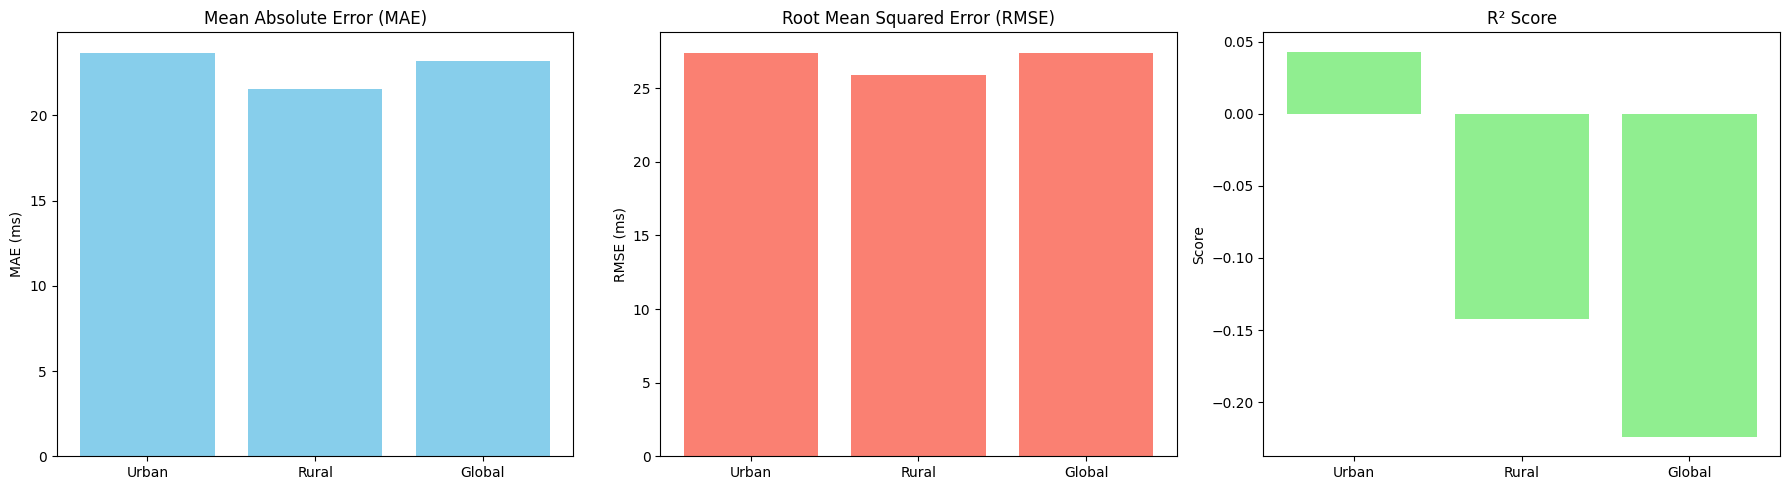

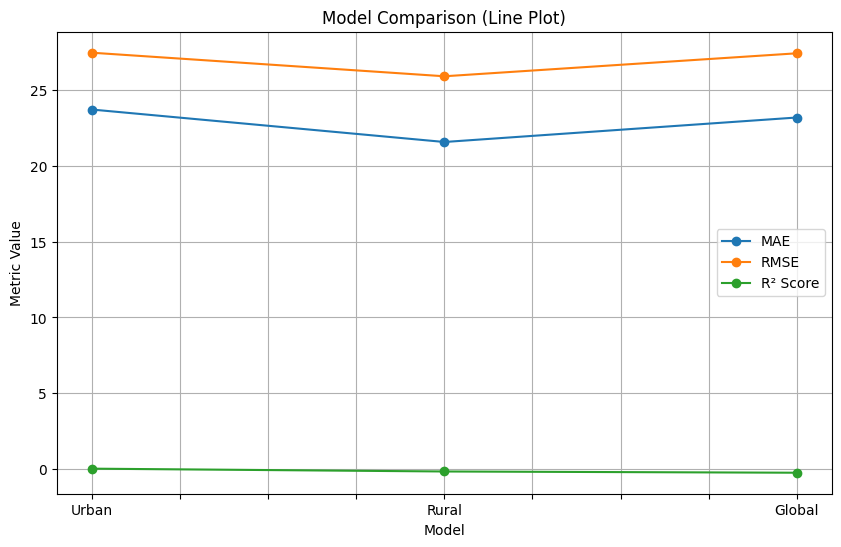

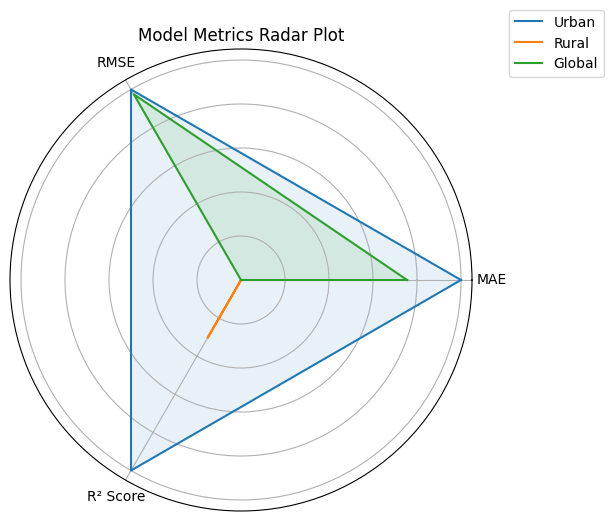

In [26]:
# Evaluation function
def evaluate(y_true, y_pred, label):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{label} Model Metrics")
    print("-"*40)
    print(f"MAE:  {mae:.4f} ms")
    print(f"RMSE: {rmse:.4f} ms")
    print(f"R²:   {r2:.4f}\n")
    return [label, mae, rmse, r2]

# Collect results
results = []
results.append(evaluate(y_urban_test, urban_preds, 'Urban'))
results.append(evaluate(y_rural_test, rural_preds, 'Rural'))
results.append(evaluate(y_full_test, global_preds, 'Global'))

# Create summary DataFrame
performance_df = pd.DataFrame(results, columns=['Model', 'MAE', 'RMSE', 'R² Score'])
display(performance_df)

# -------------------- Graphs --------------------

# 1. Bar Charts
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].bar(performance_df['Model'], performance_df['MAE'], color='skyblue')
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_ylabel('MAE (ms)')

axes[1].bar(performance_df['Model'], performance_df['RMSE'], color='salmon')
axes[1].set_title('Root Mean Squared Error (RMSE)')
axes[1].set_ylabel('RMSE (ms)')

axes[2].bar(performance_df['Model'], performance_df['R² Score'], color='lightgreen')
axes[2].set_title('R² Score')
axes[2].set_ylabel('Score')

plt.tight_layout()
plt.show()

# 2. Line Plot
performance_df.set_index('Model')[['MAE', 'RMSE', 'R² Score']].plot(
    kind='line', marker='o', figsize=(10, 6), title='Model Comparison (Line Plot)'
)
plt.ylabel('Metric Value')
plt.grid(True)
plt.show()

# 3. Radar Plot
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(performance_df[['MAE', 'RMSE', 'R² Score']])
labels = ['MAE', 'RMSE', 'R² Score']
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # close the loop

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
for idx, row in enumerate(normalized_data):
    values = row.tolist() + [row[0]]  # complete the loop
    ax.plot(angles, values, label=performance_df['Model'][idx])
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticklabels([])
ax.set_title("Model Metrics Radar Plot")
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()


## Horizontal Partitioning: Model Performance Comparison

| **Model** | **MAE (ms)** | **RMSE (ms)** | **R² Score** |
|-----------|--------------|---------------|--------------|
| **Urban** | 23.69        | 27.43         | 0.0432       |
| **Rural** | 21.55        | 25.88         | -0.1426      |
| **Global**| 23.16        | 27.39         | -0.2242      |


<div style="
    background-color: #f5e6b5;
    border-left: 4px solid #040f01;
    padding: 12px;
    margin-top: 15px;
    font-family: sans-serif;
">
<h2 style="color: #040f01; margin-top: 0;">Key Insights</h2>
    <p>

### Urban Model
- **MAE** and **RMSE** are slightly higher than the global model.
- However, **R² = 0.0432**, which is **the only positive score** — indicating slight learning beyond the mean.
- ➤ Urban model is modestly better at capturing structure in its own subset.

### Rural Model
- **Lowest MAE (21.55 ms)** and **lowest RMSE (25.88 ms)** among all models.
- Still has **negative R²**, indicating it underperforms a constant mean predictor — but **less poorly than the global model**.
- ➤ Rural model benefits more from specialized learning.

### Global Model
- Performs worse than Rural and Urban on both **R²** and **RMSE**.
- Indicates the model struggles to generalize across all geographic variations.

### Conclusion: Is Horizontal Partitioning Beneficial?

- **Horizontal Partitioning** provides benefits, especially when the data distributions of subgroups (e.g., Urban vs Rural towers) differ.
- The **Rural model** outperforms the global model in all metrics — suggesting that local modeling is more effective in less variable or more isolated environments.
- The **Urban model**, while slightly worse on MAE/RMSE, **achieves a positive R²**, indicating it captures patterns better in complex areas than the global model.


### Recommendation:

- For **distributed wireless networks**, deploying **localized models per region or tower type** (Urban/Rural) may improve accuracy and efficiency.
- Use **horizontal partitioning** when:
  - Data is **naturally grouped** (e.g., by tower, region, device type).
  - Each group has **unique patterns** not well represented in a global model.
    
    </p>
</div>



